In [1]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

In [2]:
#Constants
J2 = 0.00196; #Perturbation constant
R = 3390; #Radius of big body (km)
Mu = 4.282E4; #Gravitational parameter (km^3/s^2)
T = 24*60*60 + 39*60 + 35; #Period (s)
rp = 400; #Perigee altitude (km)

In [3]:
#Orbital Elements
n = (2*np.pi)/T; #Mean motion (s^-1)
a = (Mu/(n**2))**(1/3); #Semi-major axis (km)
e = 1 - (rp/a); #Eccentricity
print(n)
print(a)
print(e)

7.077651711832821e-05
20446.67823912314
0.9804369201039888


In [4]:
#Solving for the inclination
inc = sp.Symbol('inc');
inc = np.array(sp.solve(sp.cos(inc)**2 - 0.2,inc));
print(inc)

[1.10714871779409 2.03444393579570 4.24874137138388 5.17603658938550]


In [5]:
#Finding the minimum omega
Omegamin1 = -1.5*n*J2*((R/a)**2)*((math.cos(inc[0])) / (1 - e**2)**2);
Omegamin2 = -1.5*n*J2*((R/a)**2)*((math.cos(inc[1])) / (1 - e**2)**2);
Omegamin3 = -1.5*n*J2*((R/a)**2)*((math.cos(inc[2])) / (1 - e**2)**2);
Omegamin4 = -1.5*n*J2*((R/a)**2)*((math.cos(inc[3])) / (1 - e**2)**2);
Omegamin = np.array([Omegamin1,Omegamin2,Omegamin3,Omegamin4]);
Omegamin = Omegamin[1];
print(Omegamin)

1.7041542473950941e-06


4.9768269371933845e-09


Text(0, 0.5, 'Drift rate (rad/s)')

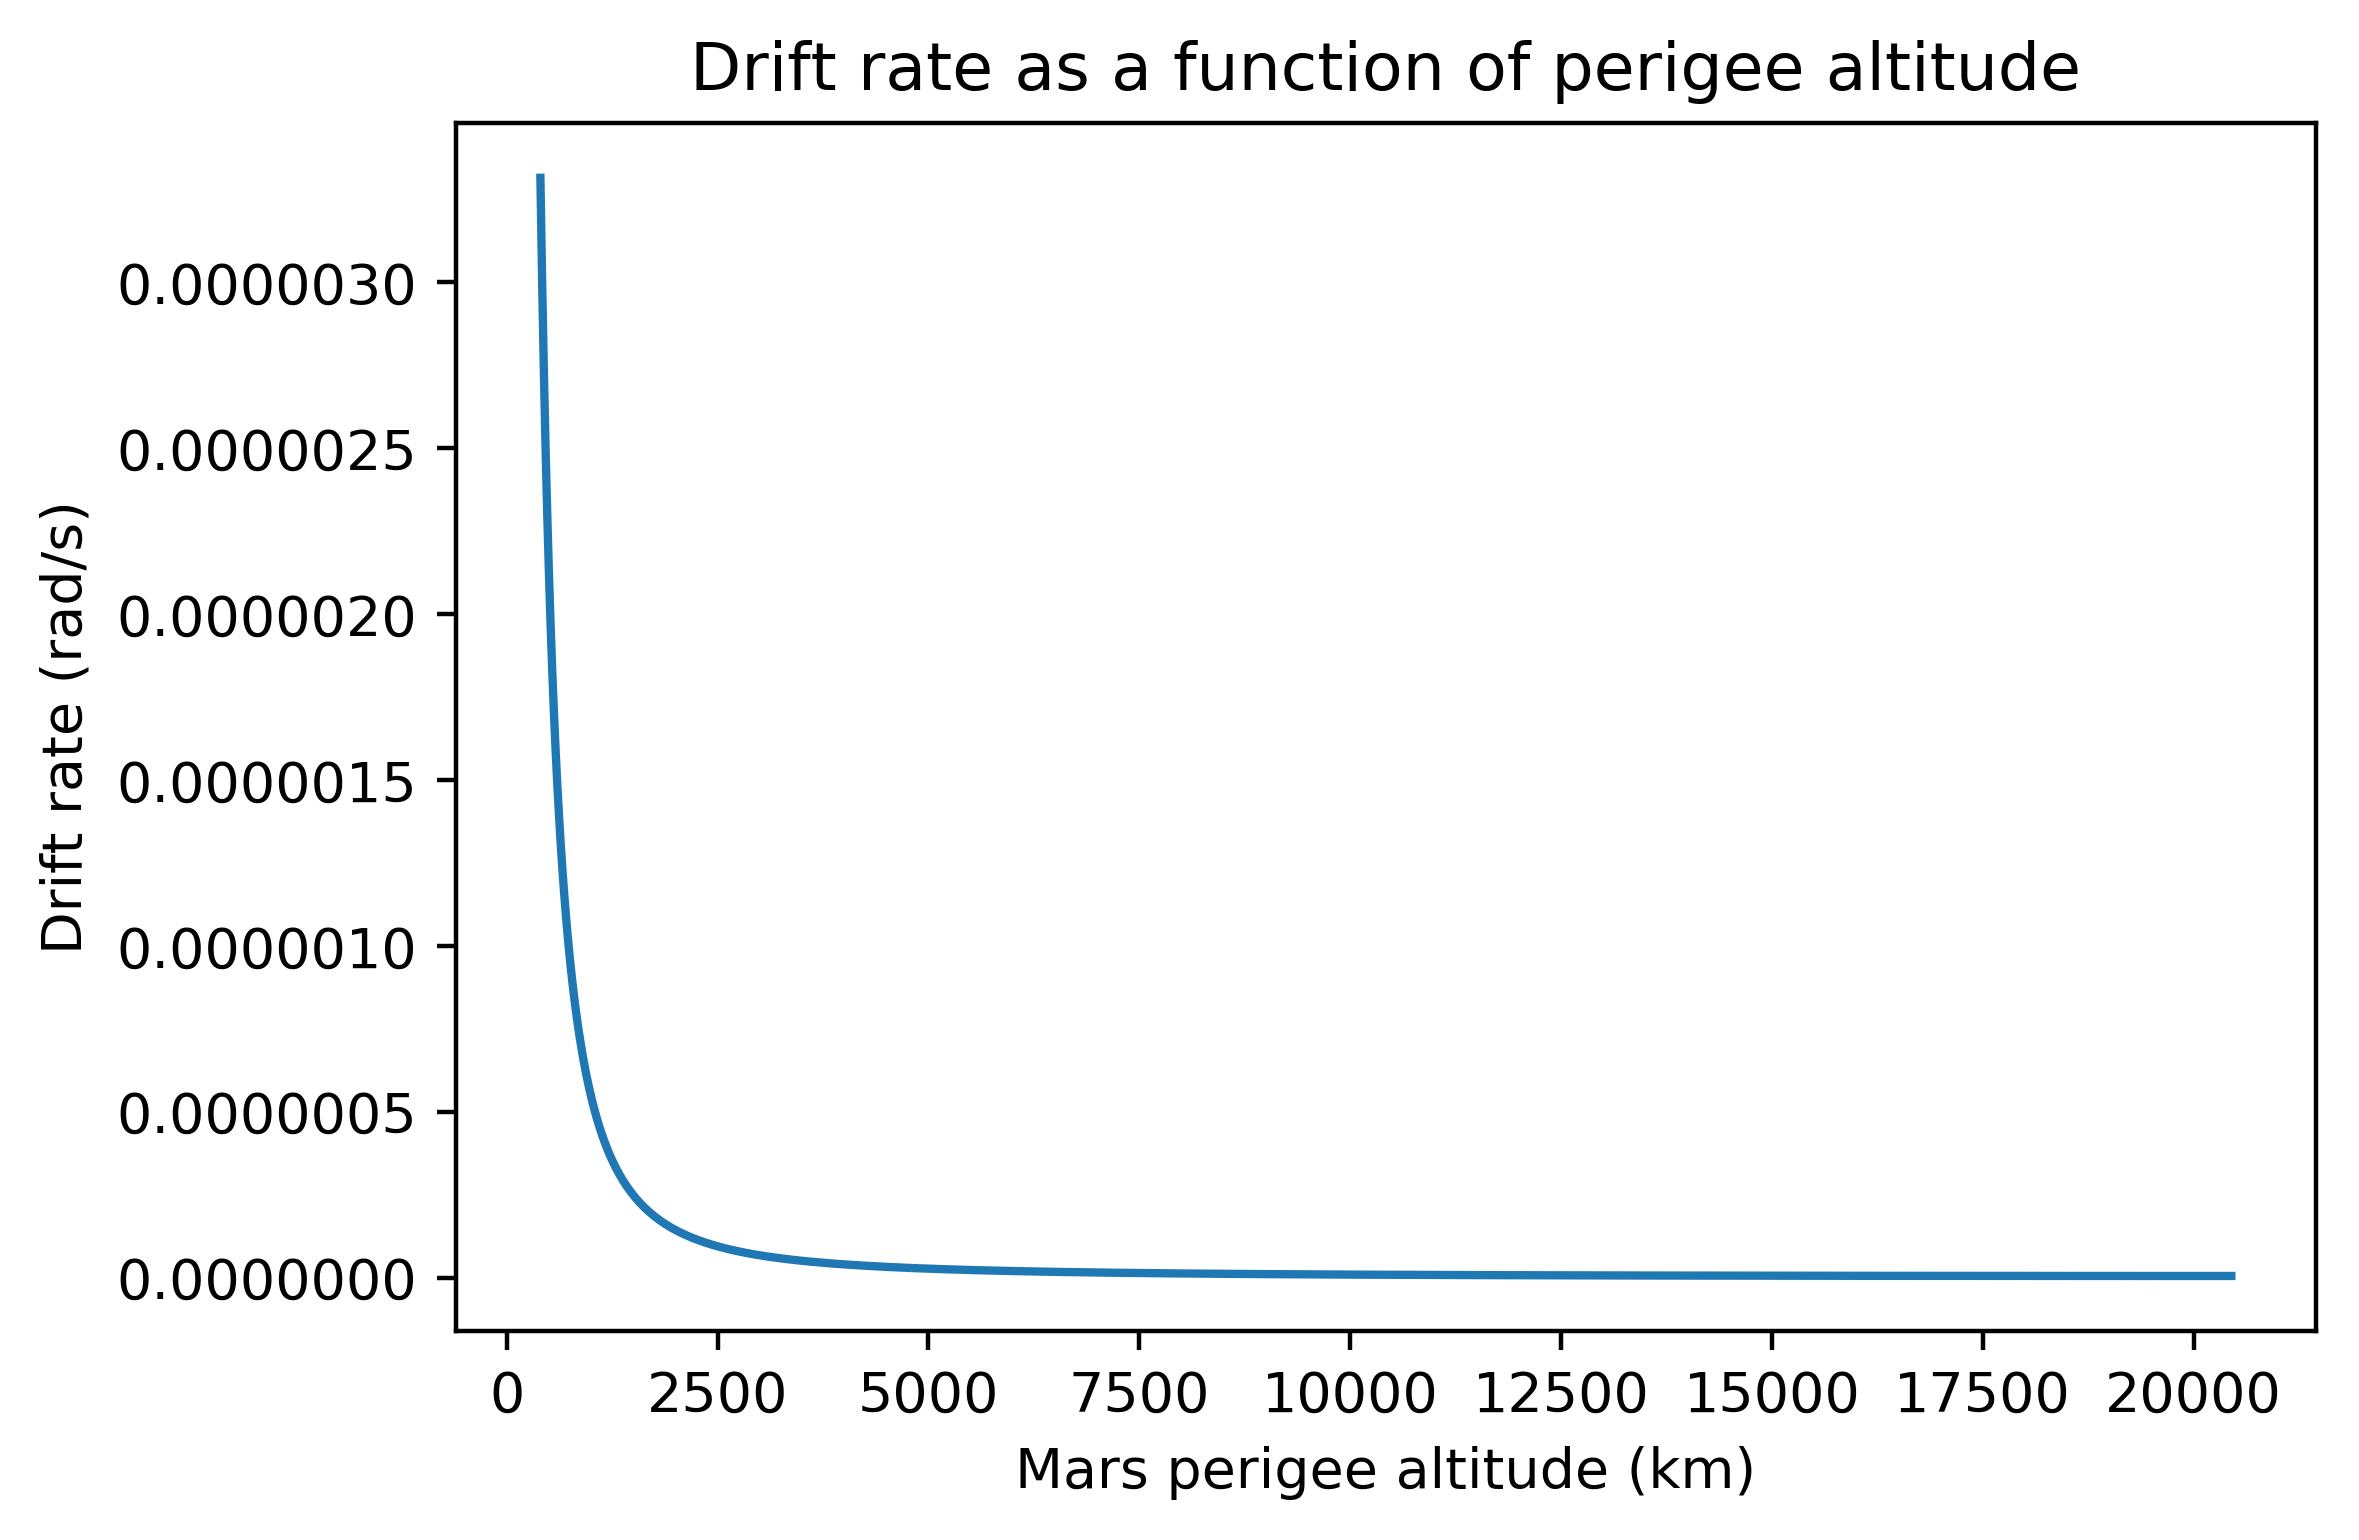

In [6]:
#Finding the minimum omega with a circular orbit
rp_array = np.linspace(rp,a,1000); #Perigee altitude (km)
n = 7.077651711832821e-05;
Omegamin_array = np.zeros(len(rp_array), dtype=int);
inc = 2.03444393579570;
J2 = 0.00108; #Perturbation constant
R = 6370; #Radius of big body (km)
a = 20446.67823912314;
for i in rp_array:
    e = 1 - (rp_array/a); #Eccentricity
    Omegamin_array = -1.5*n*J2*((R/a)**2)*((np.cos(inc)) / (1 - e**2)**2); #Minimum drift rate
print(Omegamin_array[999])
fig = plt.figure(dpi=400)
plt.title("Drift rate as a function of perigee altitude")
plt.plot(rp_array,Omegamin_array)
plt.xlabel('Mars perigee altitude (km)')
plt.ylabel('Drift rate (rad/s)')